# LGBM & XGBM

### Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#reading the file
df = pd.read_csv('diabetes (1).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#dataset structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
#summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
#checking for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


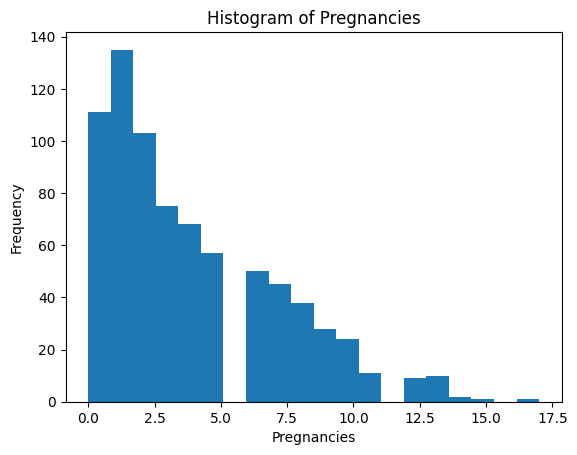

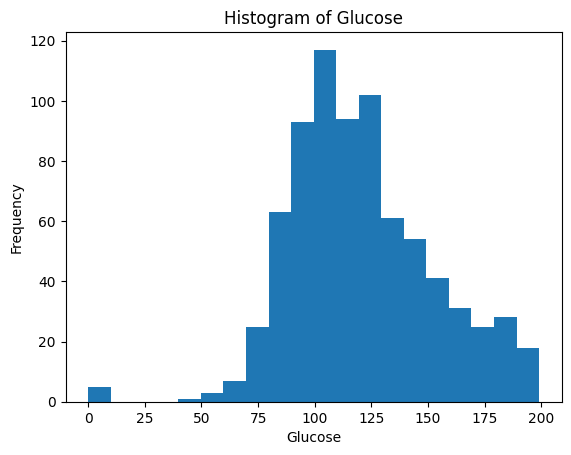

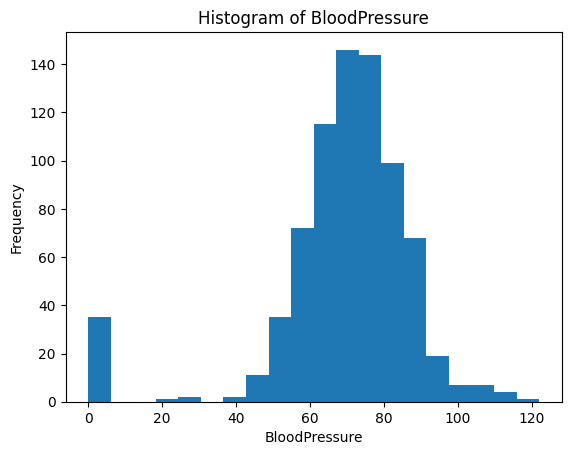

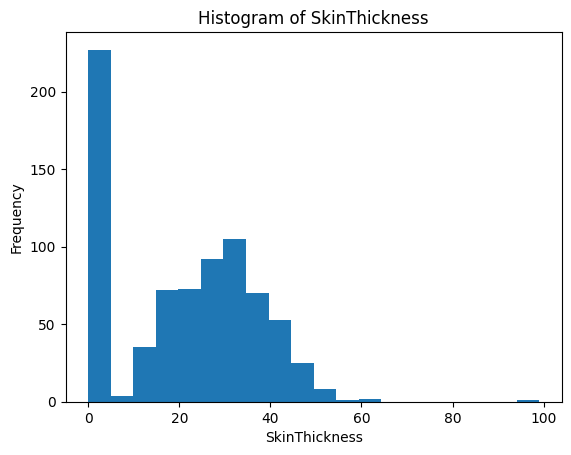

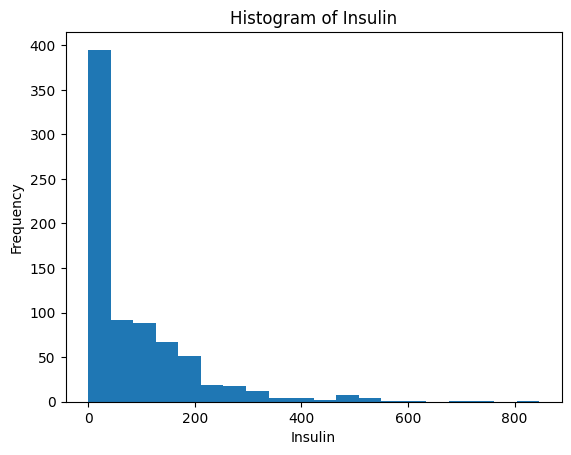

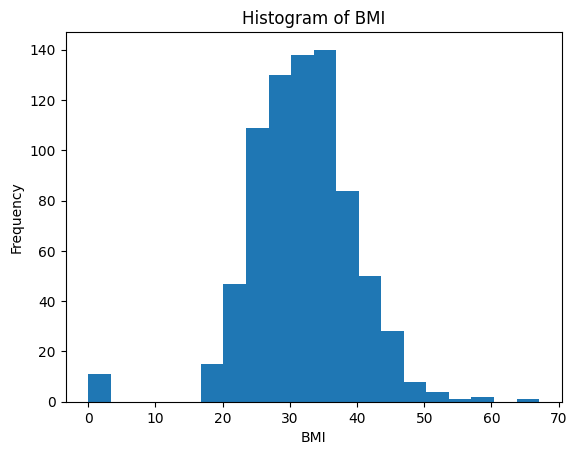

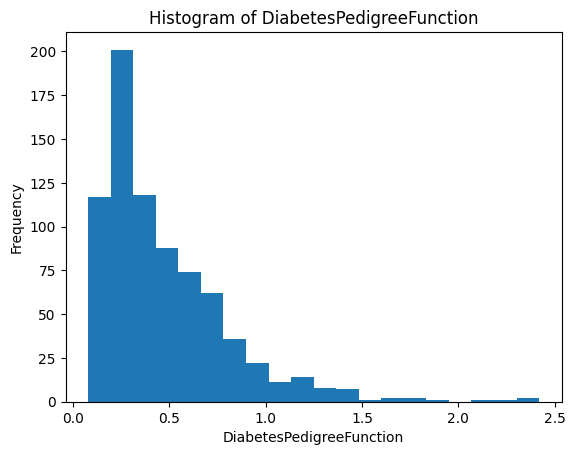

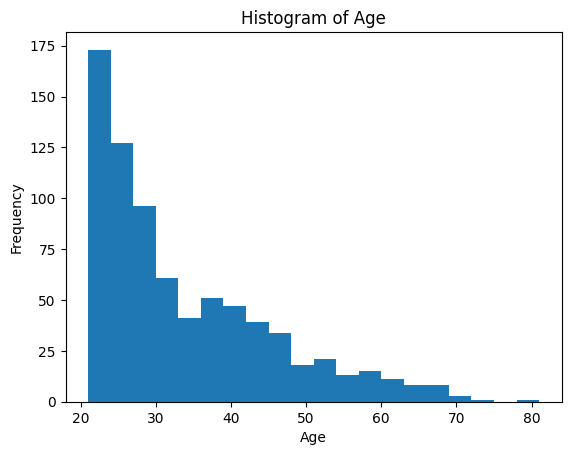

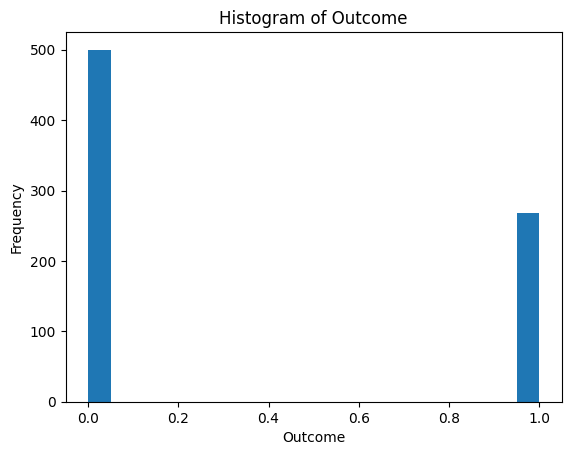

In [8]:
#exploring data distributions using histogram and boxplot

#histogram - reveals skewness
num_cols = df.columns
for col in num_cols:
  plt.figure()
  plt.hist(df[col], bins=20)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.show()

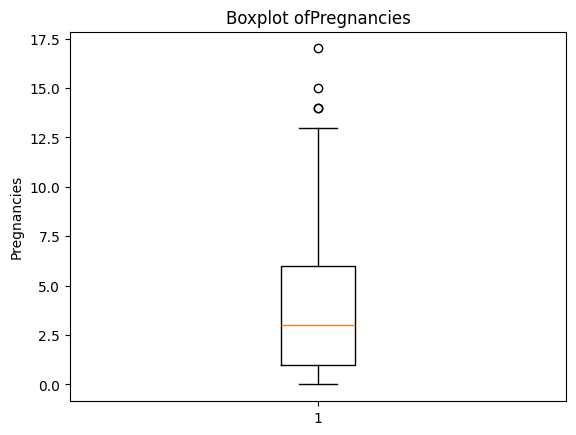

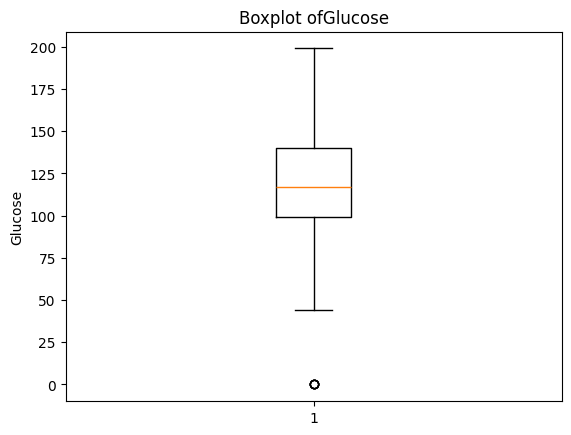

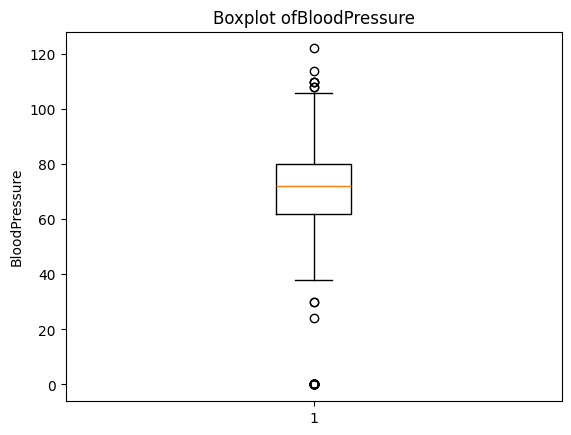

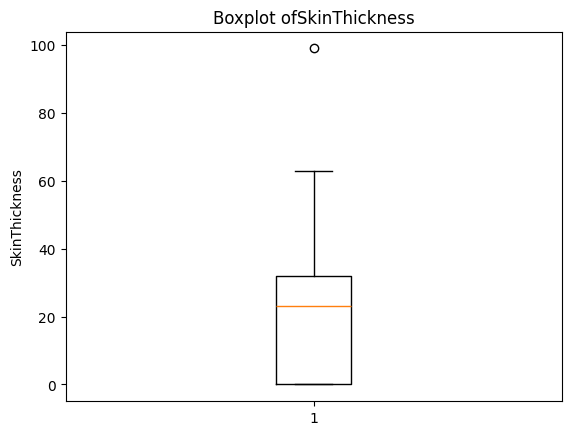

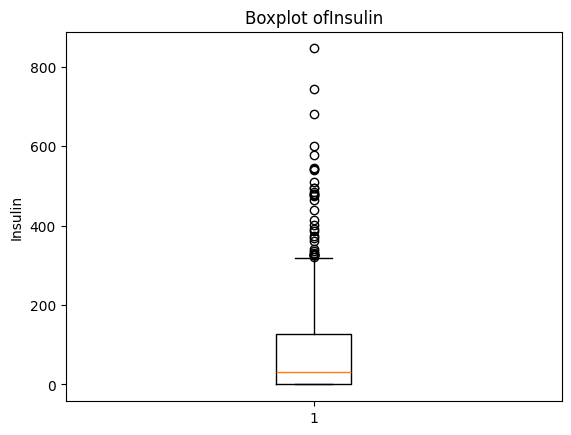

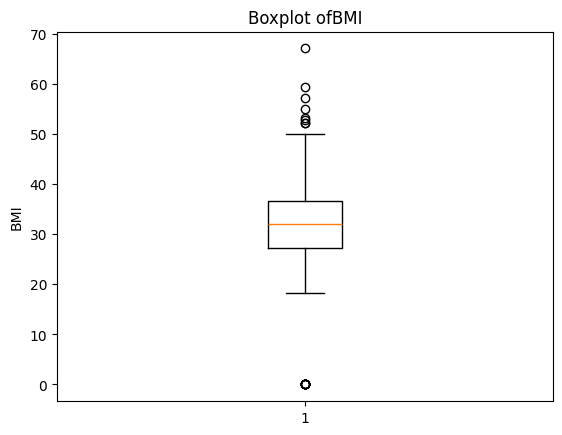

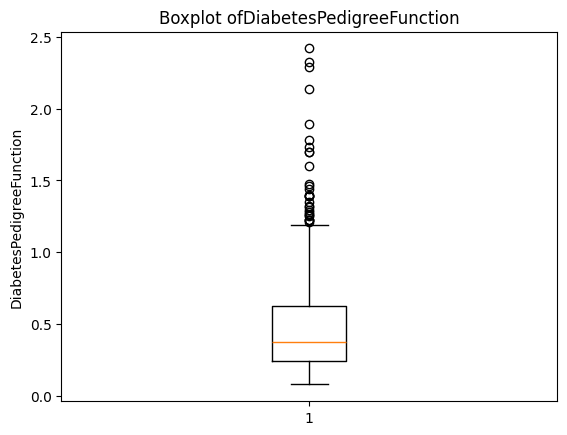

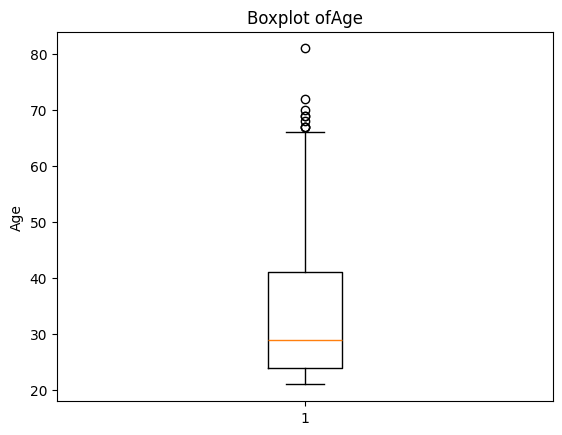

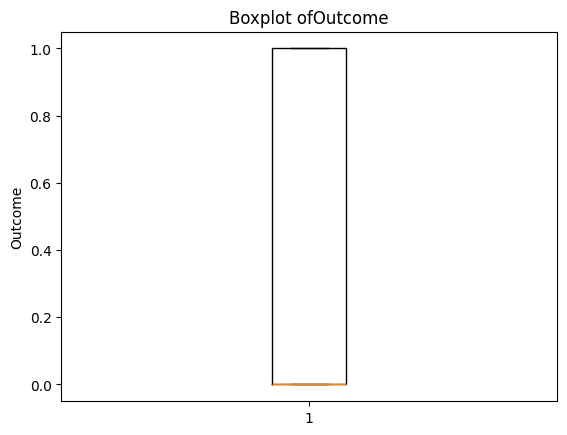

In [9]:
# box plots - detecting outliers
for col in num_cols:
  plt.figure()
  plt.boxplot(df[col])
  plt.title(f'Boxplot of{col}')
  plt.ylabel(col)
  plt.show()

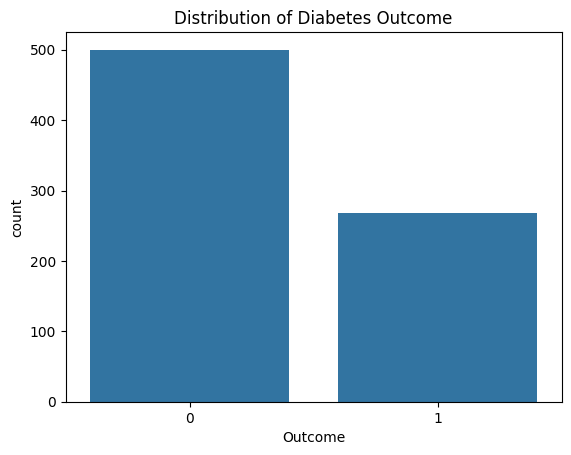

In [10]:
# relations between features and Target
#bar plots
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.show()

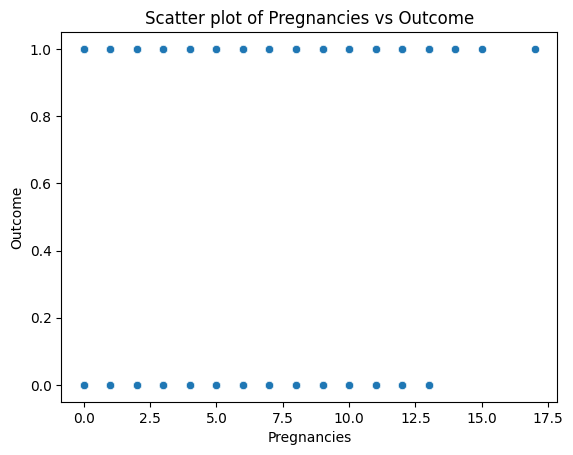

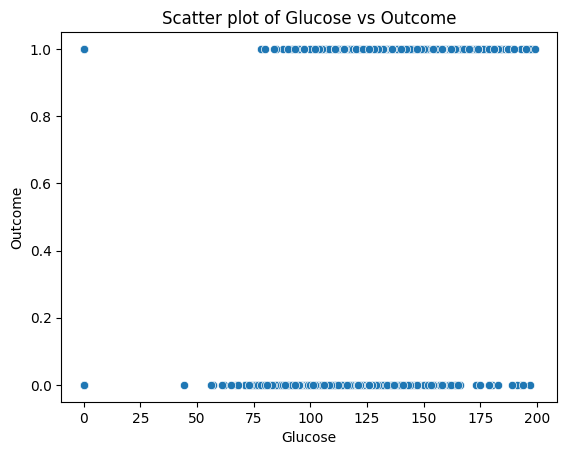

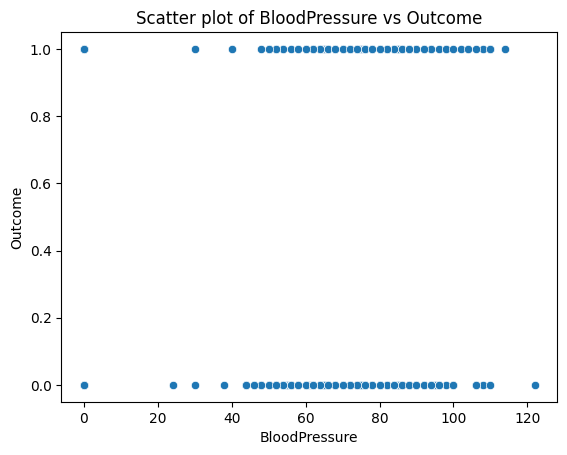

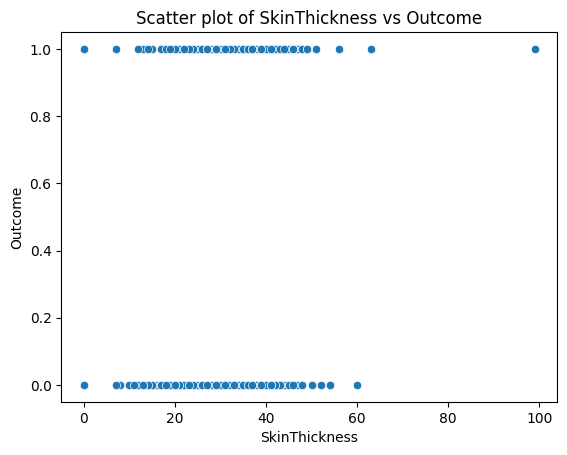

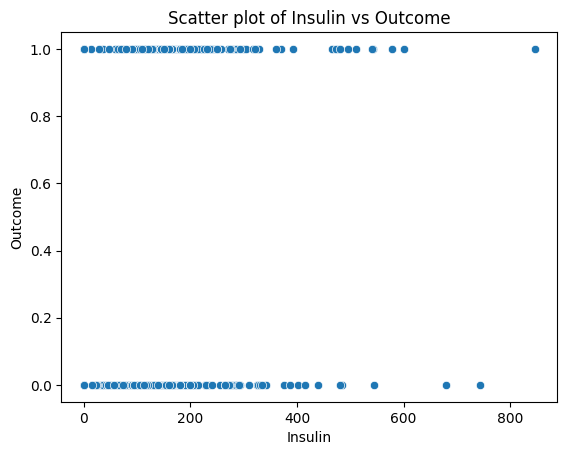

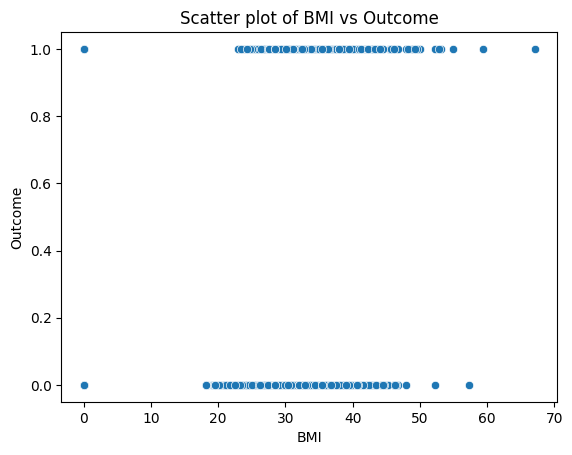

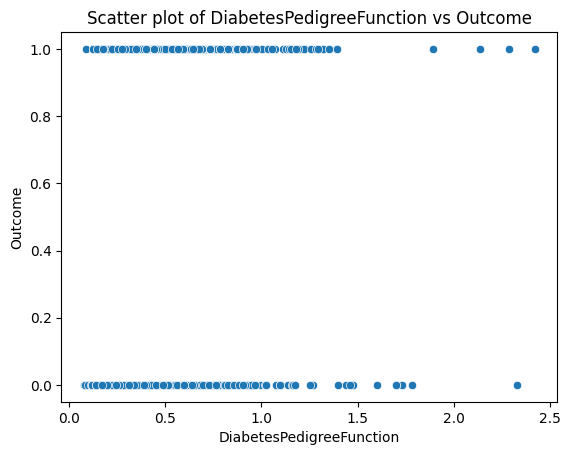

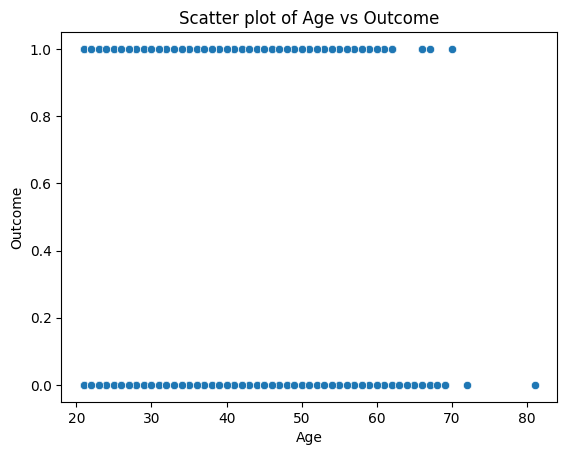

In [11]:
# scatter plots (feature vs outcome)
features = df.columns.drop('Outcome')
for col in features:
  plt.figure()
  sns.scatterplot(x=df[col], y=df['Outcome'])
  plt.title(f'Scatter plot of {col} vs Outcome')
  plt.xlabel(col)
  plt.ylabel('Outcome')
  plt.show()

It shows how feature values differ between diabetic and non-diabetic patients.

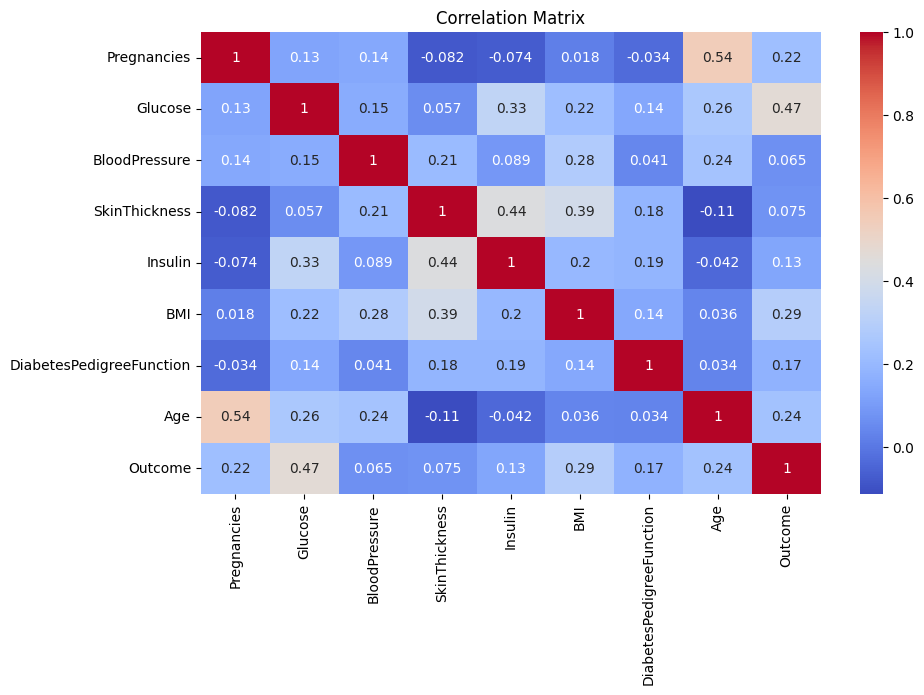

In [12]:
#correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Data Preprocessing

In [13]:
#replacing 0 with Nan
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zeros] = df[cols_with_zeros].replace(0, np.nan)

In [15]:
for col in cols_with_zeros:
  df[col] = df[col].fillna(df[col].median())

Here there are no categorical columns, So the encoding is not required all are numerical.

In [18]:
# additional preprocessing - Feature Scaling(Standard Scaler)
from sklearn.preprocessing import StandardScaler

X = df.drop('Outcome', axis =1)
y=df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [19]:
X_scaled.shape

(768, 8)

So here missing values were imputed using median values, categorical encoding was not required, and numerical features were scaled to prepare the dataset for LGBM and XGBoost models.

### Building Predictive Models

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)
X_train.shape, X_test.shape

((614, 8), (154, 8))

Since this is a binary classification we use:
* Accuracy
* Precision
* Recall
* F1-score metrics for evaluation

In [57]:
# Building LGBM Model
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42,
    max_depth=3
)

lgbm_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000110 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

LGBMClassifier(max_depth=3, random_state=42)

In [58]:
#Evaluating the LGBM Model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred_lgbm = lgbm_model.predict(X_test)

accuracy_score_lgbm = accuracy_score(y_test, y_pred_lgbm)
precision_score_lgbm = precision_score(y_test, y_pred_lgbm)
recall_score_lgbm = recall_score(y_test, y_pred_lgbm)
f1_score_lgbm = f1_score(y_test, y_pred_lgbm)

accuracy_score_lgbm, precision_score_lgbm, recall_score_lgbm, f1_score_lgbm

(0.7727272727272727,
 0.6862745098039216,
 0.6481481481481481,
 0.6666666666666666)

In [44]:
# Building XGBM Model
from xgboost import XGBClassifier

xgbm_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.5,
    random_state=42
)

xgbm_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.5, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [45]:
#Evaluating the XGBM Model

y_pred_xgbm = xgbm_model.predict(X_test)

accuracy_score_xgbm = accuracy_score(y_test, y_pred_xgbm)
precision_score_xgbm = precision_score(y_test, y_pred_xgbm)
recall_score_xgbm = recall_score(y_test, y_pred_xgbm)
f1_score_xgbm = f1_score(y_test, y_pred_xgbm)

accuracy_score_xgbm, precision_score_xgbm, recall_score_xgbm, f1_score_xgbm

(0.7792207792207793,
 0.7083333333333334,
 0.6296296296296297,
 0.6666666666666666)

In [46]:
# Cross Validation
from sklearn.model_selection import cross_val_score

lgbm_cv = cross_val_score(lgbm_model, X_train, y_train, cv=5)
xgbm_cv = cross_val_score(xgbm_model, X_train, y_train, cv=5)

lgbm_cv.mean(), xgbm_cv.mean()

[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 578
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

(np.float64(0.7459416233506597), np.float64(0.7312808210049314))

In [47]:
# Hyperparameter Tuning for LGBM
from sklearn.model_selection import GridSearchCV

param_grid_lgbm = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [-1, 5, 10]
}

grid_lgbm = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid_lgbm,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_lgbm.fit(X_train, y_train)

best_lgbm = grid_lgbm.best_estimator_

[LightGBM] [Info] Number of positive: 214, number of negative: 400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000104 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 664
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348534 -> initscore=-0.625489
[LightGBM] [Info] Start training from score -0.625489
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [52]:
grid_lgbm.best_params_

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}

In [68]:
#Evaluating the Hyperparameter Tuned LGBM Model
y_pred_best_lgbm = best_lgbm.predict(X_test)

accuracy_score_best_lgbm = accuracy_score(y_test, y_pred_best_lgbm)
precision_score_best_lgbm = precision_score(y_test, y_pred_best_lgbm)
recall_score_best_lgbm = recall_score(y_test, y_pred_best_lgbm)
f1_score_best_lgbm = f1_score(y_test, y_pred_best_lgbm)

print('Accuracy for best LGBM model:', accuracy_score_best_lgbm)
print('Precision for best LGBM model:', precision_score_best_lgbm)
print('Recall for best LGBM model:', recall_score_best_lgbm)
print('F1-Score for best LGBM model:', f1_score_best_lgbm)

Accuracy for best LGBM model: 0.7597402597402597
Precision for best LGBM model: 0.673469387755102
Recall for best LGBM model: 0.6111111111111112
F1-Score for best LGBM model: 0.6407766990291263


In [60]:
#Hyperparameter Tuning for XGBM
param_grid_xgbm = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [5, 10]
}

grid_xgbm = GridSearchCV(
    XGBClassifier(random_state=42),
    param_grid_xgbm,
    scoring="f1",
    cv=5,
    n_jobs=-1
)

grid_xgbm.fit(X_train, y_train)

best_xgbm = grid_xgbm.best_estimator_

In [61]:
grid_xgbm.best_params_

{'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200}

In [64]:
#Evaluating the Hyperparameter Tuned XGBM Model
y_pred_best_xgbm = best_xgbm.predict(X_test)

accuracy_score_best_xgbm = accuracy_score(y_test, y_pred_best_xgbm)
precision_score_best_xgbm = precision_score(y_test, y_pred_best_xgbm)
recall_score_best_xgbm = recall_score(y_test, y_pred_best_xgbm)
f1_score_best_xgbm = f1_score(y_test, y_pred_best_xgbm)

print('Accuracy for best XGBM model:', accuracy_score_best_xgbm)
print('Precision for best XGBM model:', precision_score_best_xgbm)
print('Recall for best XGBM model:', recall_score_best_xgbm)
print('F1-Score for best XGBM model:', f1_score_best_xgbm)

Accuracy for best XGBM model: 0.7727272727272727
Precision for best XGBM model: 0.6862745098039216
Recall for best XGBM model: 0.6481481481481481
F1-Score for best XGBM model: 0.6666666666666666


LightGBM and XGBoost models were trained and optimized using cross-validation and hyperparameter tuning, and evaluated using accuracy, precision, recall, and F1-score.

### Comparative Analysis

In [67]:
# comparing both performance metrics
y_pred_lgbm = lgbm_model.predict(X_test)
y_pred_xgbm = xgbm_model.predict(X_test)

results = {
    "Model": ["LightGBM", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lgbm),
        accuracy_score(y_test, y_pred_xgbm)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lgbm),
        precision_score(y_test, y_pred_xgbm)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lgbm),
        recall_score(y_test, y_pred_xgbm)
    ],
    "F1-Score": [
        f1_score(y_test, y_pred_lgbm),
        f1_score(y_test, y_pred_xgbm)
    ]
}

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,LightGBM,0.772727,0.686275,0.648148,0.666667
1,XGBoost,0.779221,0.708333,0.629630,0.666667


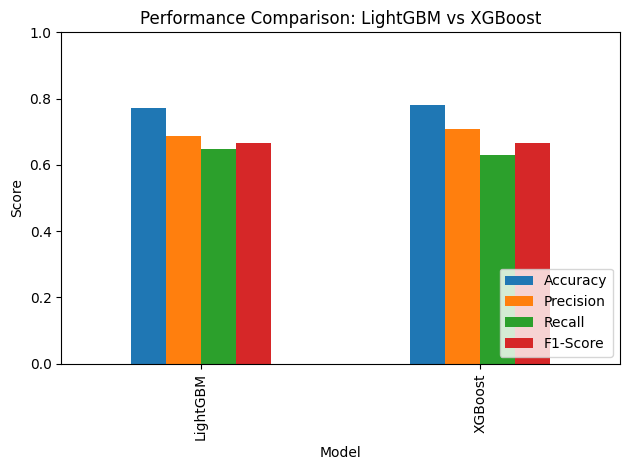

In [73]:
# Visualization of Model Comparision
# bar plot

results_df.set_index('Model').plot(kind='bar')
plt.title('Performance Comparison: LightGBM vs XGBoost')
plt.ylabel("Score")
plt.xlabel("Model")
plt.ylim(0,1)
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

Interpretation:
  * The bar chart visually compares model performance across metrics, where higher bars represent better performance and enable quick identification of strengths and trade-offs between LightGBM and XGBoost.
  * Higher bars indicate better performance
  * Allows quick visual comparison across metrics

LGBM:

Strengths:
 * Faster training on structured/tabular data
 * Handles large datasets efficiently
 * Lower memory usage

Weakness:
  * Sensitive to noisy data
  * Can overfit if not tuned carefully

XGBoost:

 Stengths:
   * Very robust and stable
   * Strong performance on imbalanced datasets
   * Handles complex feature interactions well
   
 Weakness:
   * Handles complex feature interactions well
   * Higher computational cost

Conclusion:
   * LightGBM and XGBoost were evaluated on the Diabetes dataset using accuracy, precision, recall, and F1-score. Both models showed strong performance and are suitable for binary classification tasks. LightGBM demonstrated higher recall and faster training, making it effective for early diabetes screening. XGBoost provided more stable predictions with slightly higher precision, reducing false positives. The comparative analysis highlights that model selection should depend on application requirements, with LightGBM preferred for efficiency and recall, and XGBoost for robustness and precision.